<b>Aim</b>:<br>

To build a CNN based model which can accurately detect melanoma which can  alert the dermatologists and reduce manual effort needed in diagnosis.

### Data Reading/Data Understanding 

In [4]:
#Importing the required libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
import cv2 ## pip install opencv-python
import pandas as pd
import os 
import sys
import pathlib
# Display various sample files from each class
import IPython.display as display
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
#from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D , BatchNormalization
import matplotlib.ticker as ticker
from tensorflow.keras.preprocessing.image import ImageDataGenerator
pd.options.display.float_format = '{:.2%}'.format
%matplotlib inline

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [6]:
#Reading the Training data images from the local path
#data_dir = pathlib.Path(r"CNN_assignment\Skin cancer ISIC The International Skin Imaging Collaboration\Train")
#image_count = len(list(data_dir.glob('**/*/*.jpg')))
#print("No of Images in Training set",image_count)
data_dir = pathlib.Path("gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration")
data_dir_train = pathlib.Path("gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Test')
data_dir_train_img_count = len(list(data_dir.glob('Train/*/*.jpg')))
data_dir_test_img_count = len(list(data_dir.glob('Test/*/*.jpg')))
print("No of Images in Training set",data_dir_train_img_count)
print("No of Images in Test set",data_dir_test_img_count)

No of Images in Training set 2239
No of Images in Test set 118


In [7]:
#str(list(data_dir.glob('Train'))[0])
# Finding all the class names for the image classification task
#CLASS_NAMES = np.array([item.name for item in data_dir.glob('Train/*')])
#CLASS_NAMES

### Dataset Creation

In [8]:
#Defining the parameters for the loader
batch_size = 32
img_height = 180
img_width = 180

In [9]:
#Creating Training Dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [10]:
#Creating Validation Dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [11]:
#list of class names
class_names = train_ds.class_names
print(class_names)
NUM_CLASSES = len(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Dataset visualisation

Creating a function to display an image per class

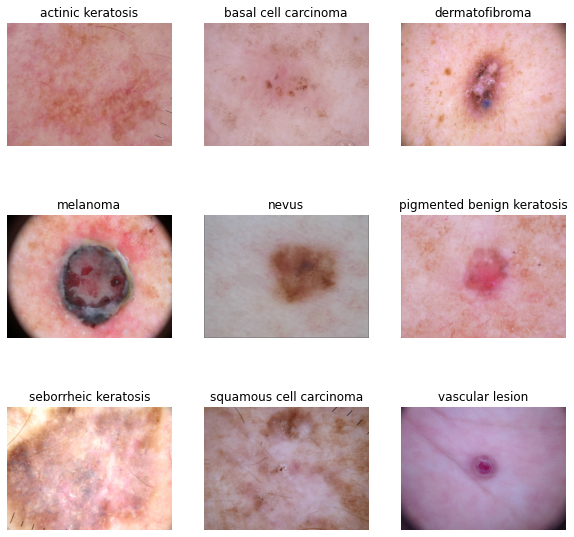

In [12]:
plt.figure(figsize=(10,10))
for index, name in enumerate(class_names):
    ax = plt.subplot(3,3,index+1)
    images = list(data_dir_train.glob(name + '/*'))
    img = mpimg.imread((str(images[0])))
    plt.imshow(img)
    plt.title(name)
    plt.axis('off')

### Model Building & training :

We will be rescaling to normalize pixel values between (0,1).The RGB channel values are in the [0, 255] range which is not ideal for a neural network.

In [13]:
# Model
model = Sequential()

# Add convolution 2D

model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255))

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(img_height, img_width, 1)))

model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))

model.add(Flatten())

model.add(Dense(128, activation='relu'))


model.add(Dense(NUM_CLASSES, activation='softmax'))  # OUTPUT 

In [14]:
#Compiling The model
model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])

In [15]:
#Training the model
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 503s 8s/step - loss: 6.0295 - accuracy: 0.2350 - val_loss: 2.0785 - val_accuracy: 0.2371
Epoch 2/20
56/56 [==============================] - 19s 312ms/step - loss: 1.9070 - accuracy: 0.2990 - val_loss: 1.7762 - val_accuracy: 0.3579
Epoch 3/20
56/56 [==============================] - 19s 312ms/step - loss: 1.7272 - accuracy: 0.3881 - val_loss: 1.7128 - val_accuracy: 0.4027
Epoch 4/20
56/56 [==============================] - 19s 313ms/step - loss: 1.5481 - accuracy: 0.5013 - val_loss: 1.5522 - val_accuracy: 0.4609
Epoch 5/20
56/56 [==============================] - 20s 316ms/step - loss: 1.4386 - accuracy: 0.5175 - val_loss: 1.7068 - val_accuracy: 0.4116
Epoch 6/20
56/56 [==============================] - 19s 313ms/step - loss: 1.4618 - accuracy: 0.4924 - val_loss: 2.0512 - val_accuracy: 0.3937
Epoch 7/20
56/56 [==============================] - 19s 311ms/step - loss: 1.4900 - accuracy: 0.4722 - val_loss: 1.7665 - val_accuracy: 0.4474
E

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 41, 41, 128)       73856     
_________________________________________________________________
flatten (Flatten)            (None, 215168)            0

### Visualizing training results

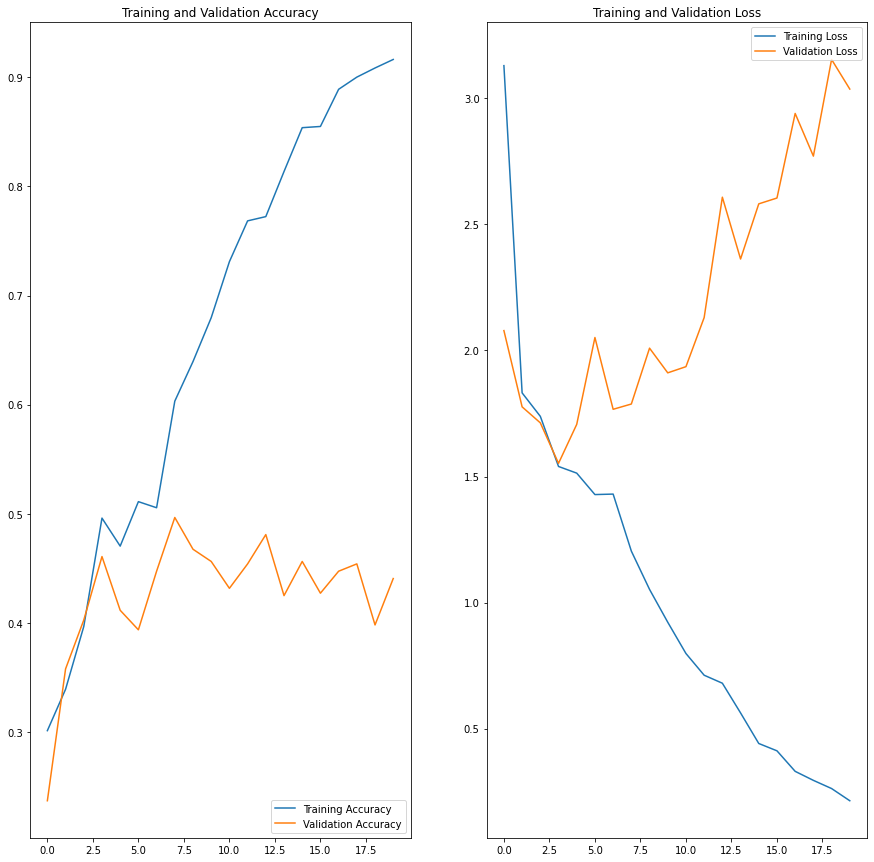

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

From the above graphs it clear that the model is overfitting. 

1. As the Training accuracy is going up validation accuracy is going down.
2. As the Training loss is going down validation loss is going up.

### Data Augmentation

Text(0.5, 1.0, 'Example of original image of nevus')

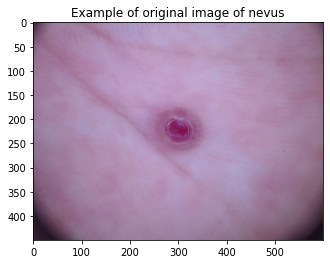

In [18]:
#Retreving an image to demonstrate dataaugmentation strategy
nevus_img = list(data_dir_train.glob("nevus" + '/*'))
nevus_img_1 = mpimg.imread((str(images[0])))
plt.imshow(nevus_img_1)
plt.title("Example of original image of nevus")

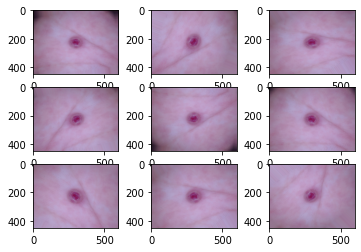

In [19]:
from tensorflow.python.keras.preprocessing.image import img_to_array
from matplotlib import pyplot
from numpy import expand_dims
data = img_to_array(nevus_img_1)
samples = expand_dims(data, 0)
datagen = ImageDataGenerator(horizontal_flip=True,vertical_flip=True,rotation_range=70,zoom_range=0.2)
it = datagen.flow(samples, batch_size=1)
for i in range(9):
 # define subplot
 pyplot.subplot(330 + 1 + i)
 # generate batch of images
 batch = it.next()
 # convert to unsigned integers for viewing
 image = batch[0].astype('uint8')
 # plot raw pixel data
 pyplot.imshow(image)
# show the figure
pyplot.show()

In [20]:
#Model
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  tf.keras.layers.experimental.preprocessing.RandomRotation(0.2),
  tf.keras.layers.experimental.preprocessing.RandomZoom(0.2),
])

data_augmentation.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255))

data_augmentation.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(img_height, img_width, 1)))

data_augmentation.add(MaxPooling2D((2, 2)))

data_augmentation.add(Dropout(0.25))#Adding dropouts as there is clear overfitting

data_augmentation.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))

#data_augmentation.add(Dropout(0.25))

data_augmentation.add(MaxPooling2D(pool_size=(2, 2)))

data_augmentation.add(Conv2D(128, (3, 3), activation='relu'))

#data_augmentation.add(Dropout(0.4))

data_augmentation.add(Flatten())

data_augmentation.add(Dense(128, activation='relu'))

#data_augmentation.add(Dropout(0.3))

data_augmentation.add(Dense(NUM_CLASSES, activation='softmax'))  # OUTPUT 

In [21]:
#Compiling The model
data_augmentation.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])

In [22]:
#Training the model
epochs = 20
history = data_augmentation.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 20s 316ms/step - loss: 10.7638 - accuracy: 0.1848 - val_loss: 2.0410 - val_accuracy: 0.2103
Epoch 2/20
56/56 [==============================] - 19s 315ms/step - loss: 1.9798 - accuracy: 0.2482 - val_loss: 2.1477 - val_accuracy: 0.2304
Epoch 3/20
56/56 [==============================] - 20s 316ms/step - loss: 2.0954 - accuracy: 0.2432 - val_loss: 1.9808 - val_accuracy: 0.2931
Epoch 4/20
56/56 [==============================] - 20s 323ms/step - loss: 1.9445 - accuracy: 0.2963 - val_loss: 1.9425 - val_accuracy: 0.2975
Epoch 5/20
56/56 [==============================] - 20s 320ms/step - loss: 1.9069 - accuracy: 0.2900 - val_loss: 1.8576 - val_accuracy: 0.3087
Epoch 6/20
56/56 [==============================] - 20s 318ms/step - loss: 1.8217 - accuracy: 0.3244 - val_loss: 1.7470 - val_accuracy: 0.4139
Epoch 7/20
56/56 [==============================] - 20s 317ms/step - loss: 1.8058 - accuracy: 0.3340 - val_loss: 1.7176 - val_accuracy: 0.362

In [23]:
data_augmentation.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_flip (RandomFlip)     (None, 180, 180, 3)       0         
_________________________________________________________________
random_rotation (RandomRotat (None, 180, 180, 3)       0         
_________________________________________________________________
random_zoom (RandomZoom)     (None, 180, 180, 3)       0         
_________________________________________________________________
rescaling_1 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 89, 89, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 89, 89, 32)       

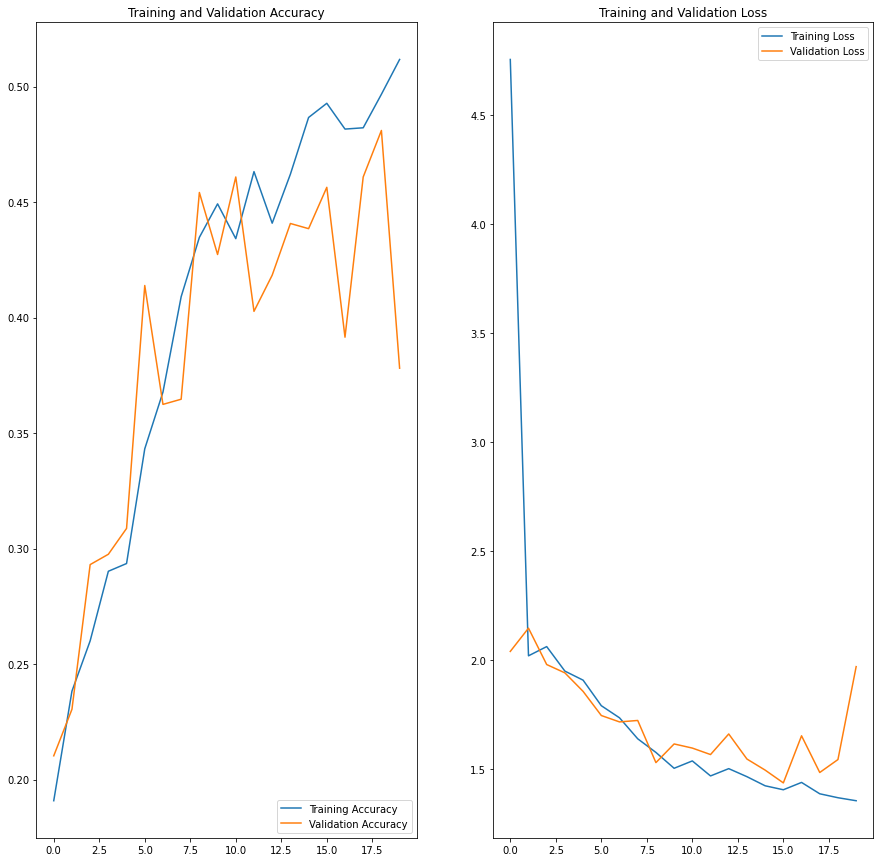

In [24]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Observations:<br>
    1. From the above graphs it looks like overfitting has been reduced.<br>
    2. Accuracy has gone down once the drop out layers have been introduced.
    
Accuracy can be improved furthur. Let's inspect and handle the class imbalances.

#### Handling class imbalances:

In [25]:
#class_percent = pd.DataFrame(columns=["count","label"])
length = list()
labels = list()
for name in class_names:
    length.append(len(list(data_dir_train.glob(name + '/*'))))
    labels.append(name)
    
label_list = list(zip(labels, length)) 
class_percent_df = pd.DataFrame(label_list, 
                  columns = ["label","count"])
class_percent_df["percentage"] = (class_percent_df["count"]/class_percent_df["count"].sum())

class_percent_df

,label,count,percentage
0,actinic keratosis,114,5.09%
1,basal cell carcinoma,376,16.79%
2,dermatofibroma,95,4.24%
3,melanoma,438,19.56%
4,nevus,357,15.94%
5,pigmented benign keratosis,462,20.63%
6,seborrheic keratosis,77,3.44%
7,squamous cell carcinoma,181,8.08%
8,vascular lesion,139,6.21%


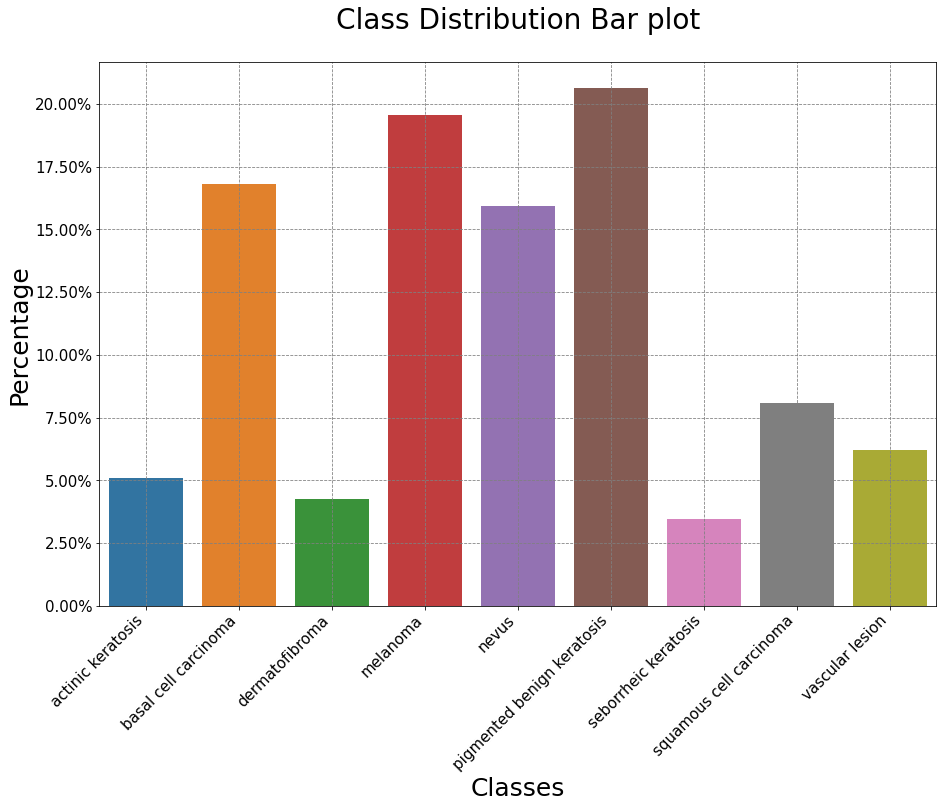

In [26]:
plt.figure(figsize=(15, 10))
ax3 = sns.barplot(
data=class_percent_df,
x='label',
y='percentage',
)
ax3.set_ylabel("Percentage",fontsize=25)
ax3.set_xlabel("Classes",fontsize=25)
ax3.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.2%}'.format(x)))
plt.grid(color='gray', linestyle='dashed')
plt.title("Class Distribution Bar plot",fontsize=28).set_position([.5, 1.05])
plt.xticks(rotation=45, ha='right')
ax3.tick_params(axis="x", labelsize=15)
ax3.tick_params(axis="y", labelsize=15)
plt.show()

1. Class seborrheic keratosis has the least number of samples.
2. Class pigmented benign keratosis has the highest number of samples.

We will be using Augmentor to recitfy the class imbalance.

In [27]:
pip install Augmentor

In [28]:
path_to_training_dataset = str(data_dir_train) + '/'
import Augmentor
for i in class_names:
    print(path_to_training_dataset + i)
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis
Initialised with 114 image(s) found.
Output directory set to gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD5E0040710>: 100%|██████████| 500/500 [00:18<00:00, 27.63 Samples/s]


gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma


Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FD5E1BB4A10>:   0%|          | 1/500 [00:00<00:56,  8.86 Samples/s]

Initialised with 376 image(s) found.
Output directory set to gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD5E00BF490>: 100%|██████████| 500/500 [00:18<00:00, 27.30 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma
Initialised with 95 image(s) found.
Output directory set to gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD5E005D710>: 100%|██████████| 500/500 [00:18<00:00, 27.55 Samples/s]


gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma


Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FD5D950DD50>: 100%|██████████| 500/500 [01:33<00:00,  5.36 Samples/s]


gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus


Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x7FD5E00D3550>: 100%|██████████| 500/500 [01:26<00:00,  5.75 Samples/s]


gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis


Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FD5E0058610>:   0%|          | 1/500 [00:00<01:00,  8.22 Samples/s]

Initialised with 462 image(s) found.
Output directory set to gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD5E3EDA750>: 100%|██████████| 500/500 [00:18<00:00, 26.42 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis
Initialised with 77 image(s) found.
Output directory set to gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7FD5E80F08D0>: 100%|██████████| 500/500 [00:41<00:00, 12.09 Samples/s]


gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma


Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FD5E3349410>:   0%|          | 1/500 [00:00<01:24,  5.91 Samples/s]

Initialised with 181 image(s) found.
Output directory set to gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7FD5E32C8D10>: 100%|██████████| 500/500 [00:19<00:00, 26.31 Samples/s]
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion
Initialised with 139 image(s) found.
Output directory set to gdrive/My Drive/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7FD5E3EEA490>: 100%|██████████| 500/500 [00:18<00:00, 27.20 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.
Lets take a look at total count of augmented images.

In [29]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [30]:
path_list = [x for x in data_dir_train.glob('*/output/*.jpg')]

In [31]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in data_dir_train.glob('*/output/*.jpg')]
lesion_list_new

['basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',
 'basal cell carcinoma',


In [32]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [33]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)

In [34]:
path_list_orig = [x for x in data_dir_train.glob('*/*.jpg')]

In [35]:
lesion_list_orig = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in data_dir_train.glob('*/*.jpg')]
lesion_list_orig

['Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',
 'Train',


In [36]:
dataframe_dict_orig = dict(zip(path_list_orig, lesion_list_orig))

In [37]:
original_df = pd.DataFrame(list(dataframe_dict_orig.items()),columns = ['Path','Label'])
#new_df = original_df.append(df2)

In [38]:
new_df = original_df.append(df2)

In [39]:
new_df['Label'].value_counts()

Train                         2239
melanoma                       500
actinic keratosis              500
dermatofibroma                 500
vascular lesion                500
nevus                          500
squamous cell carcinoma        500
seborrheic keratosis           500
pigmented benign keratosis     500
basal cell carcinoma           500
Name: Label, dtype: int64

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

In [40]:
#Creating Training Dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [41]:
#Creating Validation Dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [42]:
#Model
class_balanced_model = Sequential()
class_balanced_model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255))

class_balanced_model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 kernel_initializer='he_normal',
                 input_shape=(img_height, img_width, 1)))
#class_balanced_model.add(BatchNormalization()) #Normalization

class_balanced_model.add(MaxPooling2D((2, 2)))


class_balanced_model.add(Conv2D(64, 
                 kernel_size=(3, 3), 
                 activation='relu'))

#data_augmentation.add(Dropout(0.25))
#class_balanced_model.add(BatchNormalization()) #
class_balanced_model.add(Dropout(0.2))
class_balanced_model.add(MaxPooling2D(pool_size=(2, 2)))

class_balanced_model.add(Conv2D(128, (3, 3), activation='relu'))

#data_augmentation.add(Dropout(0.4))
#class_balanced_model.add(BatchNormalization()) #Normalization
class_balanced_model.add(Flatten())

class_balanced_model.add(Dense(128, activation='relu'))

#data_augmentation.add(Dropout(0.3))

class_balanced_model.add(Dense(NUM_CLASSES, activation='softmax'))  # OUTPUT 

In [43]:
#Compiling The model
class_balanced_model.compile(loss=keras.losses.SparseCategoricalCrossentropy(),
              optimizer='adam',
              metrics=['accuracy'])

In [44]:
epochs = 30
history = class_balanced_model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 44s 253ms/step - loss: 5.2447 - accuracy: 0.1746 - val_loss: 1.7187 - val_accuracy: 0.4165
Epoch 2/30
169/169 [==============================] - 42s 245ms/step - loss: 1.6539 - accuracy: 0.3758 - val_loss: 1.5951 - val_accuracy: 0.4157
Epoch 3/30
169/169 [==============================] - 42s 244ms/step - loss: 1.4697 - accuracy: 0.4489 - val_loss: 1.3647 - val_accuracy: 0.5011
Epoch 4/30
169/169 [==============================] - 42s 245ms/step - loss: 1.2656 - accuracy: 0.5236 - val_loss: 1.2560 - val_accuracy: 0.5434
Epoch 5/30
169/169 [==============================] - 42s 244ms/step - loss: 1.1043 - accuracy: 0.5989 - val_loss: 1.2896 - val_accuracy: 0.5635
Epoch 6/30
169/169 [==============================] - 42s 242ms/step - loss: 0.9383 - accuracy: 0.6617 - val_loss: 1.2197 - val_accuracy: 0.5872
Epoch 7/30
169/169 [==============================] - 42s 242ms/step - loss: 0.8256 - accuracy: 0.7114 - val_loss: 1.0827 - val_ac

In [45]:
class_balanced_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_2 (Rescaling)      (None, 180, 180, 3)       0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 178, 178, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 89, 89, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 87, 87, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 87, 87, 64)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 43, 43, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 41, 41, 128)      

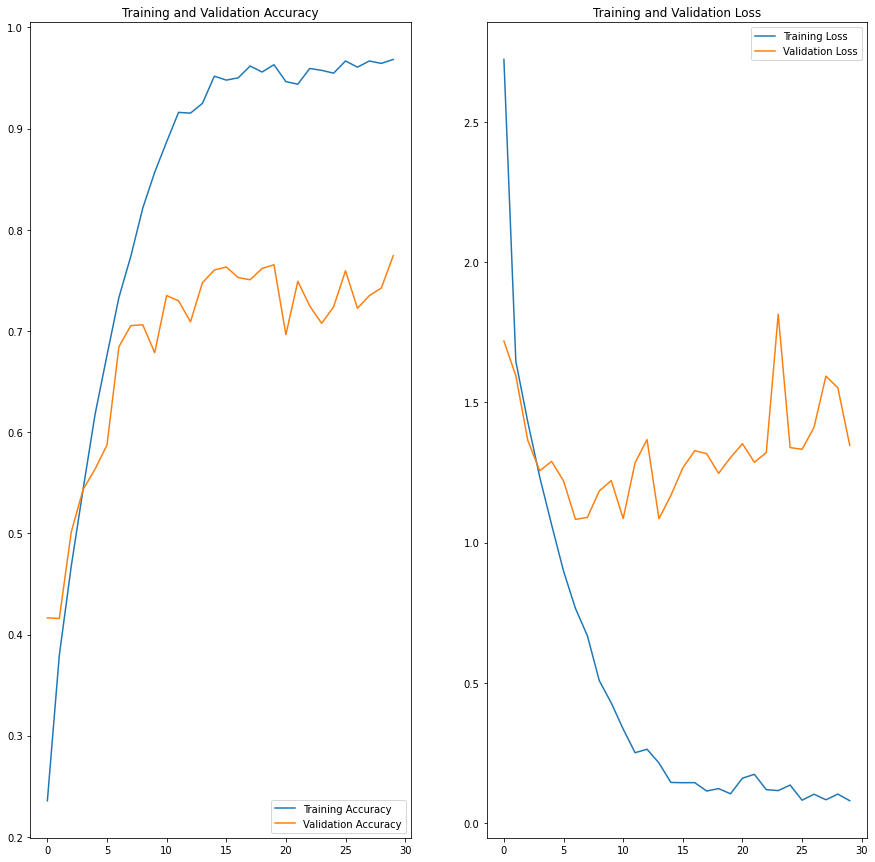

In [46]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(15, 15))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

From the above graphs it is clear that the overfitting has been reduced and the training and 
the validation accuracy have improved when compared with previous models. Class rebalancing clearly helped 
the model to learn more which increased the validation accuracy.